In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
import warnings
warnings.filterwarnings('always') 



In [2]:
df_test = pd.read_csv("Data/Test.csv")
df_train = pd.read_csv("Data/Train.csv")

In [3]:
df_test.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [5]:
df_test.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             45079
education_institute               84170
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason               87106
employment_stat                       0
wage_per_hour                         0
is_labor_union                    81322
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              45273
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                   64972
veterans_admin_questionnaire      88859
vet_benefit                           0


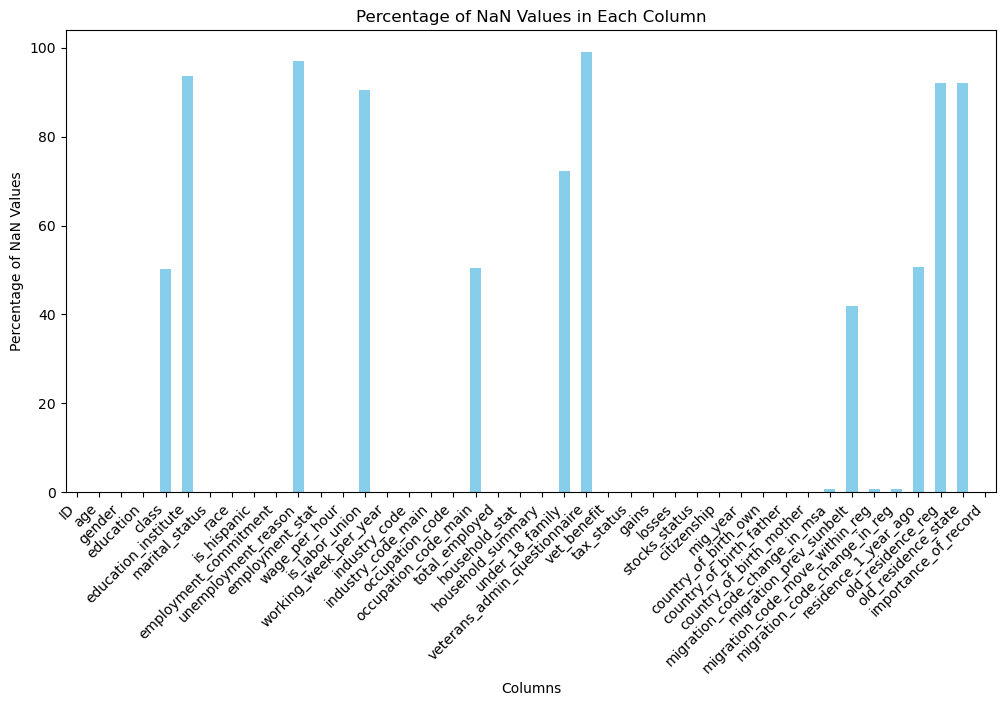

In [6]:
nan_percentage = (df_test.isnull().mean() * 100).round(2)

# Create a bar chart to visualize NaN percentages
plt.figure(figsize=(12, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
# Droping zolumns with more than 70% NAN 
nan_cols_drop  = []
for cols in df_test.columns:
    if df_test[cols].isna().sum()/df_test.shape[0] >0.7:
        nan_cols_drop.append(cols)

In [8]:
df_test  = df_test.drop(nan_cols_drop,axis=1)

In [9]:
df_test.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             45079
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
employment_stat                       0
wage_per_hour                         0
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              45273
total_employed                        0
household_stat                        0
household_summary                     0
vet_benefit                           0
tax_status                            0
gains                                 0
losses                                0
stocks_status                         0
citizenship                           0


In [10]:
df_test.drop(columns=['ID','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg',
                      'migration_code_change_in_reg','residence_1_year_ago','country_of_birth_own','country_of_birth_father',
                      'country_of_birth_mother','household_stat','industry_code','occupation_code','is_hispanic'], inplace=True)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

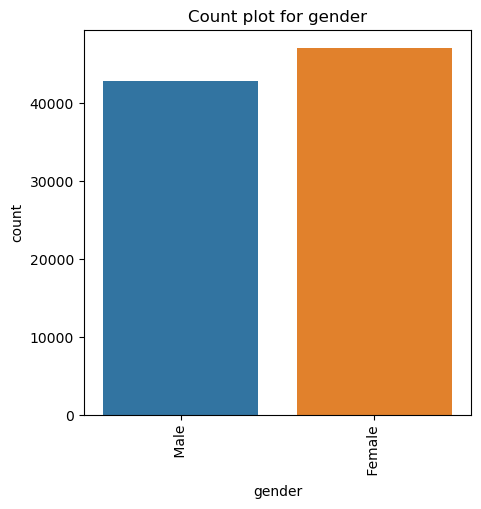

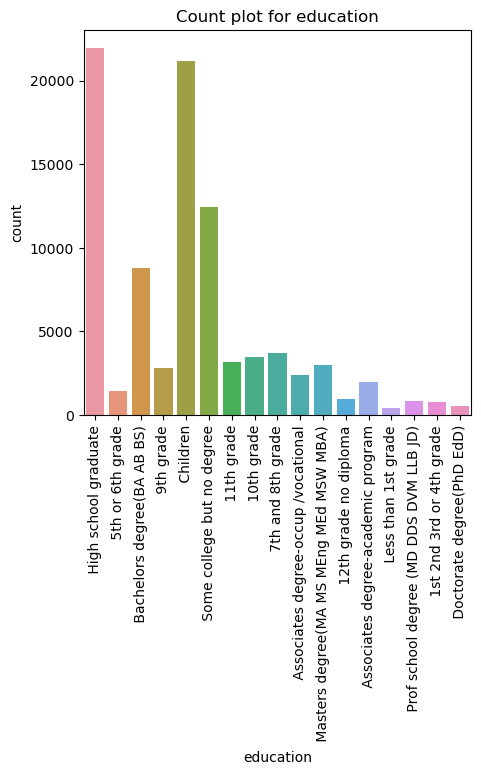

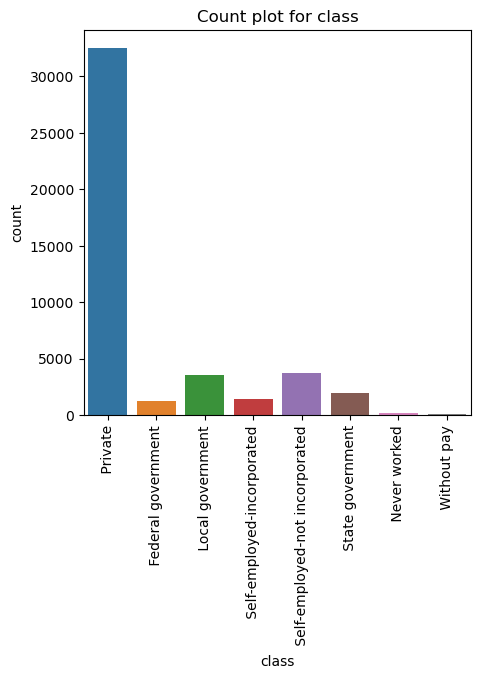

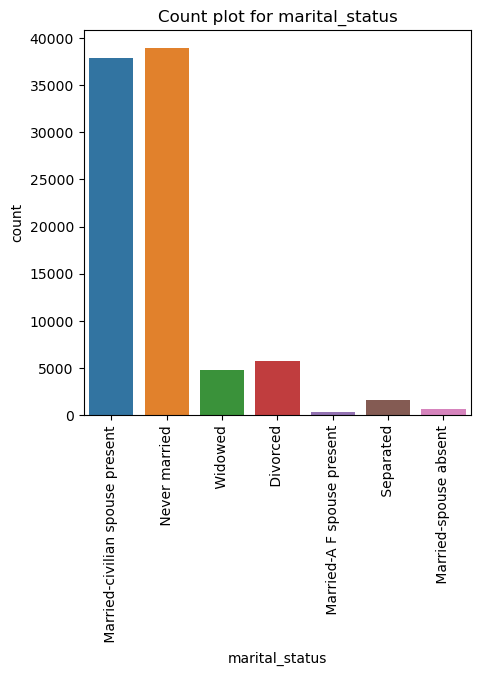

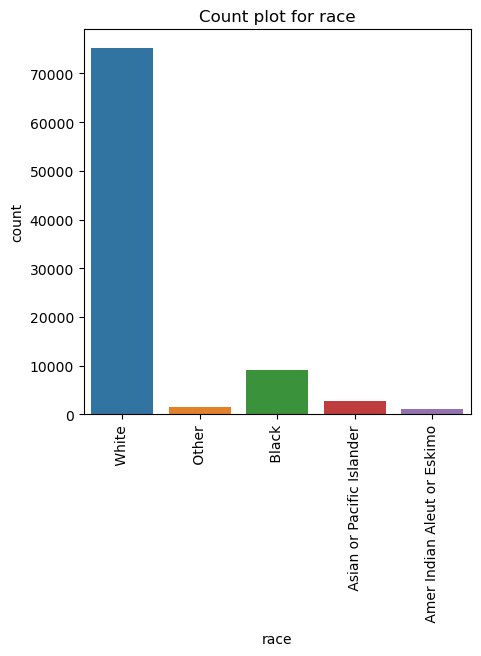

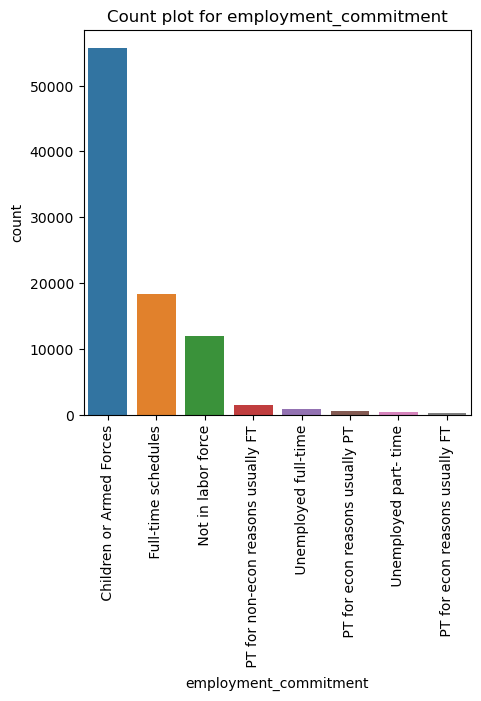

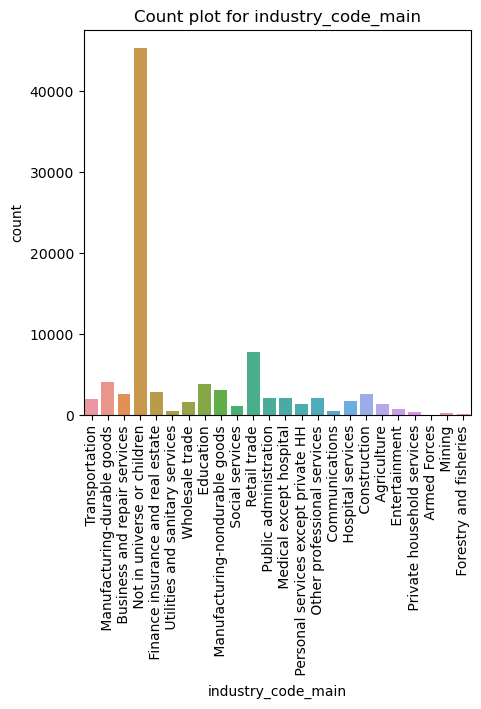

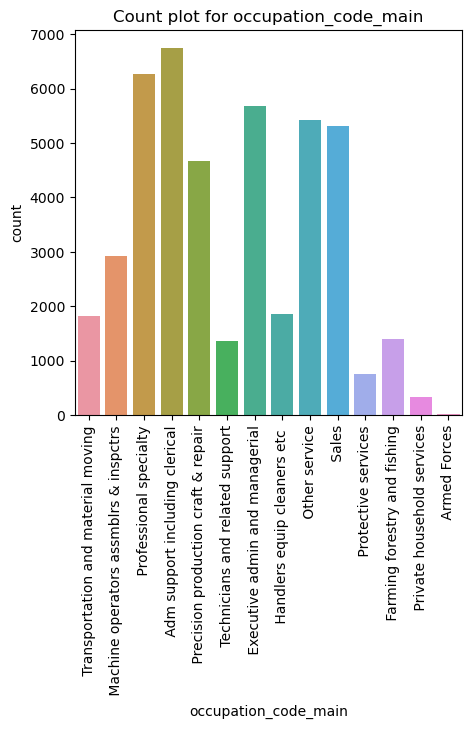

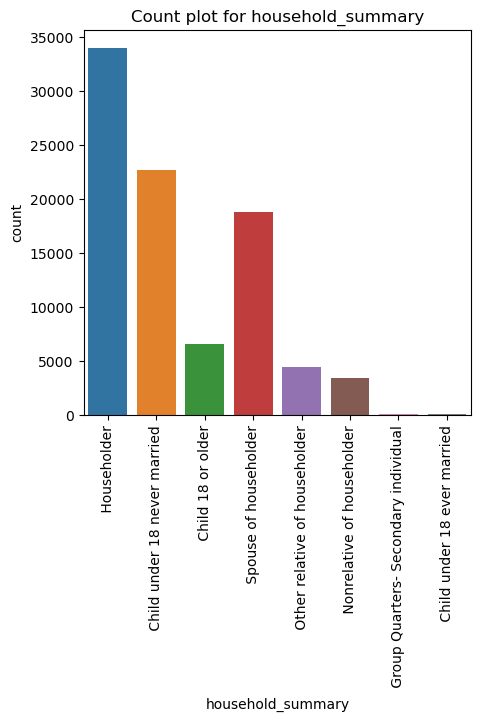

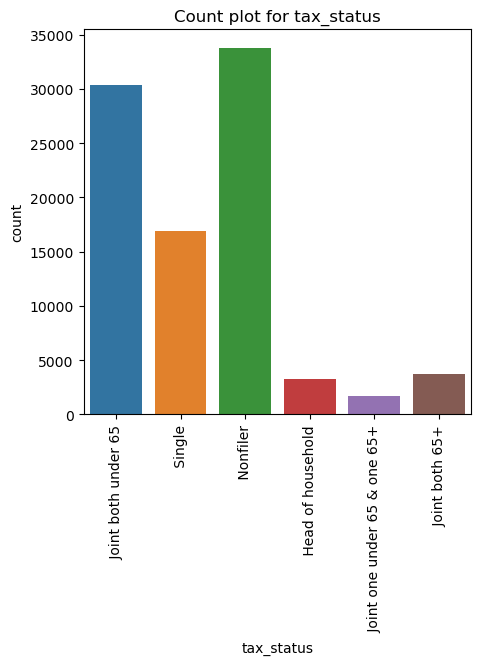

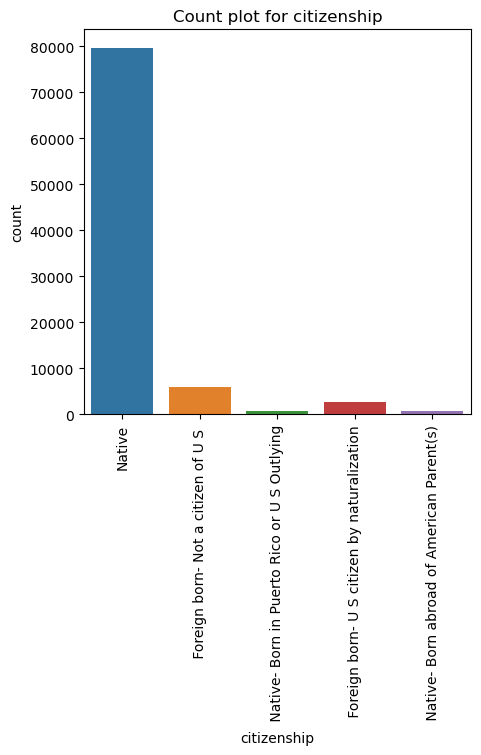

In [11]:
import datasist as ds
ds.visualizations.countplot(df_test)

In [12]:
df_test.head()

,age,gender,education,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,54,Male,High school graduate,Private,Married-civilian spouse present,White,Children or Armed Forces,0,600,46,...,2,Householder,2,Joint both under 65,0,0,0,Native,94,3388.96
1,53,Male,5th or 6th grade,Private,Married-civilian spouse present,White,Full-time schedules,0,0,52,...,4,Householder,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,1177.55
2,42,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,White,Full-time schedules,1,0,44,...,5,Householder,2,Joint both under 65,15024,0,500,Native,95,4898.55
3,16,Female,9th grade,NaN,Never married,White,Children or Armed Forces,0,0,8,...,6,Child under 18 never married,2,Single,0,0,0,Native,94,1391.44
4,16,Male,9th grade,NaN,Never married,White,Not in labor force,0,0,0,...,0,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,1933.18


In [13]:
selected_column = 'education' 

# Count and list unique values in the selected column
unique_values_counts = df_test[selected_column].value_counts()
unique_values_counts

education
 High school graduate                      21927
 Children                                  21179
 Some college but no degree                12454
 Bachelors degree(BA AB BS)                 8771
 7th and 8th grade                          3718
 10th grade                                 3465
 11th grade                                 3139
 Masters degree(MA MS MEng MEd MSW MBA)     2986
 9th grade                                  2795
 Associates degree-occup /vocational        2398
 Associates degree-academic program         1948
 5th or 6th grade                           1449
 12th grade no diploma                       981
 Prof school degree (MD DDS DVM LLB JD)      817
 1st 2nd 3rd or 4th grade                    788
 Doctorate degree(PhD EdD)                   565
 Less than 1st grade                         406
Name: count, dtype: int64

In [14]:
import pandas as pd

# Mapping for education categories
education_mapping = {
    ' Less than 1st grade': 'Elementary',
    ' 1st 2nd 3rd or 4th grade': 'Elementary',
    ' 5th or 6th grade': 'Elementary',
    ' 7th and 8th grade': 'Middle School',
    ' 9th grade': 'High School',
    ' 10th grade': 'High School',
    ' 11th grade': 'High School',
    ' 12th grade no diploma': 'High School',
    ' High school graduate': 'High School',
    ' Some college but no degree': 'Some College',
    ' Associates degree-occup /vocational': 'Associates Degree',
    ' Associates degree-academic program': 'Associates Degree',
    ' Bachelors degree(BA AB BS)': 'Bachelors',
    ' Masters degree(MA MS MEng MEd MSW MBA)': 'Masters',
    ' Prof school degree (MD DDS DVM LLB JD)': 'Professional',
    ' Doctorate degree(PhD EdD)': 'Doctorate',
    ' Children': 'Other'
}

# Create a new column 'education_categories' 
df_test['education_categories'] = df_test['education'].map(education_mapping)



In [15]:
df_test.head()

,age,gender,education,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories
0,54,Male,High school graduate,Private,Married-civilian spouse present,White,Children or Armed Forces,0,600,46,...,Householder,2,Joint both under 65,0,0,0,Native,94,3388.96,High School
1,53,Male,5th or 6th grade,Private,Married-civilian spouse present,White,Full-time schedules,0,0,52,...,Householder,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,1177.55,Elementary
2,42,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,White,Full-time schedules,1,0,44,...,Householder,2,Joint both under 65,15024,0,500,Native,95,4898.55,Bachelors
3,16,Female,9th grade,NaN,Never married,White,Children or Armed Forces,0,0,8,...,Child under 18 never married,2,Single,0,0,0,Native,94,1391.44,High School
4,16,Male,9th grade,NaN,Never married,White,Not in labor force,0,0,0,...,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,1933.18,High School


In [16]:
df_test.drop(columns= ['education'], inplace = True)
df_test = df_test[(df_test['age'] < 0) | (df_test['age'] > 17)]

In [17]:
selected_column = 'class' 

# Count and list unique values in the selected column
unique_values_counts = df_test[selected_column].value_counts()
unique_values_counts

class
 Private                           31437
 Self-employed-not incorporated     3696
 Local government                   3485
 State government                   1903
 Self-employed-incorporated         1455
 Federal government                 1281
 Never worked                         98
 Without pay                          66
Name: count, dtype: int64

In [18]:
nan_class = df_test['class'].isnull().sum()
nan_class

21241

In [19]:
nan_class_df = df_test[df_test['class'].isnull()]
nan_class_df.head(50)

,age,gender,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories
14,32,Female,NaN,Married-civilian spouse present,White,Children or Armed Forces,0,0,52,Not in universe or children,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,2600.07,Some College
15,42,Female,NaN,Married-civilian spouse present,White,Children or Armed Forces,0,0,0,Not in universe or children,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,2629.88,High School
16,38,Female,NaN,Married-civilian spouse present,White,Children or Armed Forces,0,0,0,Not in universe or children,...,Spouse of householder,2,Joint both under 65,0,0,59,Native,94,1544.03,Bachelors
23,30,Female,NaN,Married-civilian spouse present,White,Children or Armed Forces,0,0,0,Not in universe or children,...,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,3160.68,Some College
38,64,Male,NaN,Married-civilian spouse present,White,Not in labor force,0,0,0,Not in universe or children,...,Householder,2,Joint both under 65,0,0,0,Native,95,357.83,High School
43,68,Female,NaN,Never married,Black,Not in labor force,0,0,0,Not in universe or children,...,Householder,2,Single,0,0,0,Native,95,481.62,High School
45,90,Female,NaN,Never married,White,Not in labor force,0,0,0,Not in universe or children,...,Householder,2,Single,0,0,40,Native,95,1484.20,Middle School
46,35,Female,NaN,Widowed,White,Children or Armed Forces,2,0,34,Not in universe or children,...,Child 18 or older,2,Head of household,0,0,0,Native,94,1190.63,High School
56,90,Male,NaN,Widowed,White,Not in labor force,0,0,0,Not in universe or children,...,Householder,2,Single,0,0,0,Native,95,1119.79,Middle School
58,21,Female,NaN,Married-civilian spouse present,Other,Children or Armed Forces,0,0,0,Not in universe or children,...,Spouse of householder,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,94,612.48,High School


In [20]:
# change all NAN in class to Unemployed
df_test['class'].fillna('Unemployed', inplace=True)

In [21]:
# Categorize the ages

bins = [17, 24, 44, 59, float('inf')]
labels = ['18-24', '25-44', '45-59', '60 and above']

# Create a new column 'age_group' based on age ranges
df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)


In [22]:
#  Drop age column
df_test.drop(columns= ['age'], inplace = True)

In [23]:
nan_ocm= df_test['occupation_code_main'].isnull().sum()
nan_ocm

21339

In [29]:
nan_ocm_df = df_test[df_test['occupation_code_main'].isnull()]
nan_ocm_df.head(50)


,gender,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories,age_group
14,Female,Unemployed,Married-civilian spouse present,White,Children or Armed Forces,0,0,52,Not in universe or children,NaN,...,2,Joint both under 65,0,0,0,Native,94,2600.07,Some College,25-44
15,Female,Unemployed,Married-civilian spouse present,White,Children or Armed Forces,0,0,0,Not in universe or children,NaN,...,2,Joint both under 65,0,0,0,Native,94,2629.88,High School,25-44
16,Female,Unemployed,Married-civilian spouse present,White,Children or Armed Forces,0,0,0,Not in universe or children,NaN,...,2,Joint both under 65,0,0,59,Native,94,1544.03,Bachelors,25-44
23,Female,Unemployed,Married-civilian spouse present,White,Children or Armed Forces,0,0,0,Not in universe or children,NaN,...,2,Joint both under 65,0,0,0,Native,94,3160.68,Some College,25-44
38,Male,Unemployed,Married-civilian spouse present,White,Not in labor force,0,0,0,Not in universe or children,NaN,...,2,Joint both under 65,0,0,0,Native,95,357.83,High School,60 and above
43,Female,Unemployed,Never married,Black,Not in labor force,0,0,0,Not in universe or children,NaN,...,2,Single,0,0,0,Native,95,481.62,High School,60 and above
45,Female,Unemployed,Never married,White,Not in labor force,0,0,0,Not in universe or children,NaN,...,2,Single,0,0,40,Native,95,1484.20,Middle School,60 and above
46,Female,Unemployed,Widowed,White,Children or Armed Forces,2,0,34,Not in universe or children,NaN,...,2,Head of household,0,0,0,Native,94,1190.63,High School,25-44
56,Male,Unemployed,Widowed,White,Not in labor force,0,0,0,Not in universe or children,NaN,...,2,Single,0,0,0,Native,95,1119.79,Middle School,60 and above
58,Female,Unemployed,Married-civilian spouse present,Other,Children or Armed Forces,0,0,0,Not in universe or children,NaN,...,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,94,612.48,High School,18-24


In [25]:
df_test.isnull().sum()

gender                       0
class                        0
marital_status               0
race                         0
employment_commitment        0
employment_stat              0
wage_per_hour                0
working_week_per_year        0
industry_code_main           0
occupation_code_main     21339
total_employed               0
household_summary            0
vet_benefit                  0
tax_status                   0
gains                        0
losses                       0
stocks_status                0
citizenship                  0
mig_year                     0
importance_of_record         0
education_categories         0
age_group                    0
dtype: int64

In [26]:
for column in df_test.columns:
    if column not in ['ID','age','wage_per_hour','working_week_per_year']:
        print('Column: {} - Unique Values: {}'.format(column, df_test[column].unique()))
        print('==='*15)

Column: gender - Unique Values: [' Male' ' Female']
Column: class - Unique Values: [' Private' ' Federal government' 'Unemployed' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Never worked' ' Without pay']
Column: marital_status - Unique Values: [' Married-civilian spouse present' ' Never married' ' Widowed'
 ' Divorced' ' Married-A F spouse present' ' Separated'
 ' Married-spouse absent']
Column: race - Unique Values: [' White' ' Black' ' Asian or Pacific Islander' ' Other'
 ' Amer Indian Aleut or Eskimo']
Column: employment_commitment - Unique Values: [' Children or Armed Forces' ' Full-time schedules'
 ' PT for non-econ reasons usually FT' ' Not in labor force'
 ' PT for econ reasons usually PT' ' Unemployed part- time'
 ' Unemployed full-time' ' PT for econ reasons usually FT']
Column: employment_stat - Unique Values: [0 1 2]
Column: industry_code_main - Unique Values: [' Transportation' ' Manufacturing-durable goods'
 '

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64662 entries, 0 to 89785
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 64662 non-null  object  
 1   class                  64662 non-null  object  
 2   marital_status         64662 non-null  object  
 3   race                   64662 non-null  object  
 4   employment_commitment  64662 non-null  object  
 5   employment_stat        64662 non-null  int64   
 6   wage_per_hour          64662 non-null  int64   
 7   working_week_per_year  64662 non-null  int64   
 8   industry_code_main     64662 non-null  object  
 9   occupation_code_main   43323 non-null  object  
 10  total_employed         64662 non-null  int64   
 11  household_summary      64662 non-null  object  
 12  vet_benefit            64662 non-null  int64   
 13  tax_status             64662 non-null  object  
 14  gains                  64662 non-null  int6

In [28]:
import warnings

# Suppress FutureWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    ds.structdata.describe(df_test)

First five data points


,gender,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories,age_group
0,Male,Private,Married-civilian spouse present,White,Children or Armed Forces,0,600,46,Transportation,Transportation and material moving,...,2,Joint both under 65,0,0,0,Native,94,3388.96,High School,45-59
1,Male,Private,Married-civilian spouse present,White,Full-time schedules,0,0,52,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,1177.55,Elementary,45-59
2,Male,Private,Married-civilian spouse present,White,Full-time schedules,1,0,44,Business and repair services,Professional specialty,...,2,Joint both under 65,15024,0,500,Native,95,4898.55,Bachelors,25-44
9,Female,Private,Married-civilian spouse present,White,Full-time schedules,0,0,52,Finance insurance and real estate,Adm support including clerical,...,2,Joint both under 65,0,0,0,Native,95,1517.17,High School,45-59
10,Male,Private,Married-civilian spouse present,White,Full-time schedules,2,2000,52,Utilities and sanitary services,Precision production craft & repair,...,2,Joint both under 65,0,0,0,Native,95,3860.41,Some College,25-44




Random five data points


,gender,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories,age_group
9231,Female,Private,Married-civilian spouse present,Asian or Pacific Islander,Children or Armed Forces,0,0,0,Manufacturing-nondurable goods,Adm support including clerical,...,2,Nonfiler,0,0,0,Foreign born- Not a citizen of U S,94,1258.66,High School,25-44
15131,Male,Private,Married-civilian spouse present,White,PT for non-econ reasons usually FT,0,0,52,Construction,Handlers equip cleaners etc,...,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,1183.00,Elementary,45-59
20821,Female,Unemployed,Widowed,White,Children or Armed Forces,0,0,0,Not in universe or children,NaN,...,2,Single,0,0,320,Native,94,231.84,Bachelors,60 and above
57655,Male,Private,Married-civilian spouse present,White,Full-time schedules,0,0,52,Wholesale trade,Sales,...,2,Joint both under 65,0,0,0,Native,95,3581.87,High School,45-59
34765,Female,Local government,Never married,White,Full-time schedules,0,500,12,Education,Executive admin and managerial,...,2,Nonfiler,0,0,0,Native,95,3714.62,Some College,25-44




Last five data points


,gender,class,marital_status,race,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories,age_group
89780,Male,Private,Married-civilian spouse present,White,Full-time schedules,0,0,52,Finance insurance and real estate,Precision production craft & repair,...,2,Joint both under 65,0,0,500,Native,95,1323.41,Some College,60 and above
89782,Female,Unemployed,Married-civilian spouse present,White,Not in labor force,0,0,0,Not in universe or children,NaN,...,2,Joint both 65+,0,0,0,Native,95,1985.66,Middle School,60 and above
89783,Female,Federal government,Married-civilian spouse present,White,Children or Armed Forces,0,0,52,Forestry and fisheries,Other service,...,2,Joint one under 65 & one 65+,0,0,0,Native,94,552.74,High School,60 and above
89784,Female,Private,Married-A F spouse present,White,Full-time schedules,2,0,43,Retail trade,Sales,...,2,Joint both under 65,0,0,0,Native,95,1917.71,High School,25-44
89785,Female,Private,Never married,White,Full-time schedules,0,0,52,Retail trade,Other service,...,2,Single,0,0,0,Native,95,1997.29,Some College,18-24




Shape of  data set: (64662, 22)


Size of  data set: 1422564


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
gender,object
class,object
marital_status,object
race,object
employment_commitment,object
employment_stat,int64
wage_per_hour,int64
working_week_per_year,int64
industry_code_main,object
occupation_code_main,object




Numerical Features in Data set
['employment_stat', 'wage_per_hour', 'working_week_per_year', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record', 'age_group']


Categorical Features in Data set


['gender',
 'class',
 'marital_status',
 'race',
 'employment_commitment',
 'industry_code_main',
 'occupation_code_main',
 'household_summary',
 'tax_status',
 'citizenship',
 'education_categories']



Statistical Description of Columns


,employment_stat,wage_per_hour,working_week_per_year,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,64662.000000,64662.000000,64662.000000,64662.000000,64662.000000,64662.000000,64662.000000,64662.000000,64662.000000,64662.000000
mean,0.236321,73.962636,31.751245,2.644784,1.985664,584.582289,50.075995,275.631221,94.499180,1762.193542
std,0.631420,307.216657,23.474550,2.399493,0.118873,5420.834510,312.394700,2226.857232,0.500003,1002.547519
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,94.000000,42.820000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1075.950000
50%,0.000000,0.000000,50.000000,2.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1635.910000
75%,0.000000,0.000000,52.000000,5.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2216.257500
max,2.000000,9400.000000,52.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,12960.200000




Description of Categorical Features


C:\Users\kobby\AppData\Roaming\Python\Python311\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\kobby\AppData\Roaming\Python\Python311\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\kobby\AppData\Roaming\Python\Python311\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\kobby\AppData\Roaming\Python\Python311\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [30]:
ds.visualizations.class_count(df_test)

Class Count for gender


,count
gender,
Female,34584
Male,30078


Class Count for class


,count
class,
Private,31437
Unemployed,21241
Self-employed-not incorporated,3696
Local government,3485
State government,1903
Self-employed-incorporated,1455
Federal government,1281
Never worked,98
Without pay,66


Class Count for marital_status


,count
marital_status,
Married-civilian spouse present,37884
Never married,13821
Divorced,5699
Widowed,4759
Separated,1552
Married-spouse absent,663
Married-A F spouse present,284


Class Count for race


,count
race,
White,55249
Black,5873
Asian or Pacific Islander,1932
Other,969
Amer Indian Aleut or Eskimo,639


Class Count for employment_commitment


,count
employment_commitment,
Children or Armed Forces,32556
Full-time schedules,17933
Not in labor force,10656
PT for non-econ reasons usually FT,1482
Unemployed full-time,963
PT for econ reasons usually PT,549
Unemployed part- time,283
PT for econ reasons usually FT,240


Unique classes in industry_code_main too large
Class Count for occupation_code_main


,count
occupation_code_main,
Adm support including clerical,6654
Professional specialty,6230
Executive admin and managerial,5670
Sales,5047
Other service,4974
Precision production craft & repair,4636
Machine operators assmblrs & inspctrs,2898
Transportation and material moving,1805
Handlers equip cleaners etc,1709


Class Count for household_summary


,count
household_summary,
Householder,33930
Spouse of householder,18767
Child 18 or older,6508
Nonrelative of householder,2865
Other relative of householder,2528
Group Quarters- Secondary individual,64


Class Count for tax_status


,count
tax_status,
Joint both under 65,30323
Single,16094
Nonfiler,9489
Joint both 65+,3735
Head of household,3286
Joint one under 65 & one 65+,1735


Class Count for citizenship


,count
citizenship,
Native,55790
Foreign born- Not a citizen of U S,5128
Foreign born- U S citizen by naturalization,2566
Native- Born abroad of American Parent(s),591
Native- Born in Puerto Rico or U S Outlying,587


Class Count for education_categories


,count
education_categories,
High School,29198
Some College,12450
Bachelors,8771
Associates Degree,4346
Masters,2986
Middle School,2916
Elementary,2613
Professional,817
Doctorate,565


In [31]:
df_vd = pd.read_csv("Data/VariableDefinitions.csv")
df_ss = pd.read_csv("Data/SampleSubmission.csv")

In [32]:
df_vd.head(1000)

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


In [ ]:
df_ss.head(1000)

# Cleaning train data





In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
df_train.isnull().sum()

In [ ]:
nan_percentage = (df_train.isnull().mean() * 100).round(2)

# Create a bar chart to visualize NaN percentages
plt.figure(figsize=(12, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()